In [15]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [16]:
numpy_array = np.genfromtxt("A2Q1Data.csv", delimiter=",")
print(numpy_array.shape)

(1000,)


In [49]:
iteration = 20
m = np.array([])
s = np.array([])
p = np.array([])
for i in range(4):
    m = np.append(m,rd.randint(0,100))
    s = np.append(s,rd.randint(0,100))
    p = np.append(p,rd.randint(0,100))
    
l = np.array([1,2,3,4])
for i in range(999):
    temp = np.array([])
    for j in range(4):
        temp = np.append(temp,rd.randint(0,100))
    l = np.vstack([l,temp])
# m = np.ones(4)#mu
# arr = (numpy_array.size,4)
# l = np.ones(arr)#lambda
# s = np.ones(4)#sigma
# p = np.ones(4)#pi

log = np.array([])

# print(m)
# print(l.shape)
# print(s)
# print(p)
# print(log)

for t in range(iteration):
    for i in range(numpy_array.size):
        sum = 0
        for k in range(4):
            val = np.exp(-((numpy_array[i]-m[k])**2/(2*s[k]+(1e-6))))*p[k]
            l[i][k] = val
            sum = sum + val
        l[i] = l[i]/sum
        
    for k in range(4):
        p_sum = 0
        num_m = 0
        num_v = 0
        for i in range(numpy_array.size):
            p_sum = p_sum + l[i][k]
            num_m = num_m + numpy_array[i] + l[i][k]
        p_sum = p_sum + 1e-6
        m[k] = num_m/p_sum
        
        for i in range(numpy_array.size):
            num_v = num_v + l[i][k]*((numpy_array[i]-m[k])**2)
            
        s[k] = num_v/p_sum
        p[k] = p_sum/1000
        
    res = 0
    for i in range(numpy_array.size):
        val = 0
        for k in range(4):
            val = val + np.exp(-((numpy_array[i]-m[k])**2/(2*s[k]+1e-6)))*p[k]*(1/np.sqrt(2*np.pi*s[k]+1e-6))
        res = res + np.log(val)
    log = np.append(log,res)
#print(log)

itr = np.array([])
for i in range(iteration):
    itr = np.append(itr,i+1)
    
# print(itr)

[-1554.53224267 -1555.73426128 -1557.41421204 -1559.18888098
 -1561.05997674 -1563.03163742 -1565.10805074 -1567.29341481
 -1569.59191163 -1572.00767695 -1574.54476595 -1577.20711465
 -1579.99849679 -1582.92247604 -1585.98235354 -1589.18111078
 -1592.52134807 -1596.0052187  -1599.63435957 -1603.40981872]


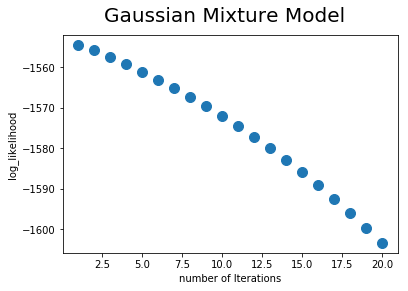

In [50]:
plt.suptitle('Gaussian Mixture Model', fontsize=20)
plt.ylabel("log_likelihood")
plt.xlabel("number of Iterations")
plt.scatter(itr[:], log[:], s=100)
plt.show()